<a href="https://colab.research.google.com/github/Ayana-Man-oj/codsoft/blob/main/imagecaptioning/imagecaptioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries Installed Successfully ✅

Loading Pretrained BLIP Model... (This may take a minute)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

The image processor of type `BlipImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/473 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie text_decoder.cls.predictions.bias to text_decoder.cls.predictions.decoder.bias, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie text_decoder.bert.embeddings.word_embeddings.weight to text_decoder.cls.predictions.decoder.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
BlipForConditionalGeneration LOAD REPORT from: Salesforce/blip-image-captioning-base
Key                                       | Status     |  | 
------------------------------------------+------------+--+-
text_decoder.bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identic

Model Loaded Successfully ✅

Upload an image to generate caption:


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Saving foodee logo.png to foodee logo.png


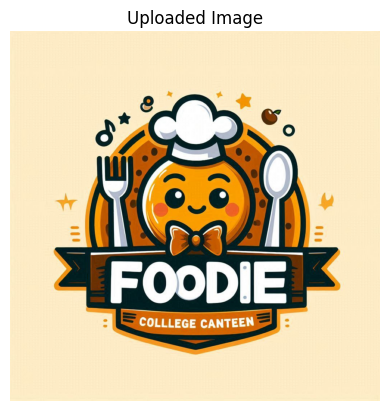


Generating Caption...

🖼 Generated Caption:
---------------------------------
a logo for a food company
---------------------------------


In [1]:
# ==========================================
# TASK 3 - IMAGE CAPTIONING (COLAB VERSION)
# ==========================================

# Install required libraries
!pip -q install transformers torch torchvision pillow matplotlib

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt
from google.colab import files

print("Libraries Installed Successfully ✅")

# ------------------------------------------
# STEP 1: Load Pretrained BLIP Model
# ------------------------------------------

print("\nLoading Pretrained BLIP Model... (This may take a minute)")

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

print("Model Loaded Successfully ✅")

# ------------------------------------------
# STEP 2: Upload Image
# ------------------------------------------

print("\nUpload an image to generate caption:")
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")

# Display image
plt.imshow(image)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

# ------------------------------------------
# STEP 3: Generate Caption
# ------------------------------------------

print("\nGenerating Caption...")

inputs = processor(images=image, return_tensors="pt")
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)

print("\n🖼 Generated Caption:")
print("---------------------------------")
print(caption)
print("---------------------------------")
